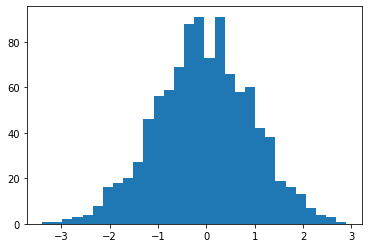

In [9]:
import numpy as np
import matplotlib.pyplot as plt#导入模块

plt.hist(np.random.normal(loc=0.0, scale=1.0, size=1000), bins=30)#bins直方图的柱数
plt.show()


In [11]:
import numpy as np;
mean = (2, 3)
cov = [[0.6, 0], [0, 0.6]]
x1 = np.random.multivariate_normal(mean, cov, (1, 2), 'raise')
mean = (0, 4)
cov = [[0.4, 0], [0, 0.4]]
x2 = np.random.multivariate_normal(mean, cov, (1, 200), 'raise')
print(x1)
#print(x2)

[[[2.71358944 3.21094257]
  [1.98050733 2.05703285]]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt


def gen_clusters():
    mean1 = [0,0]
    cov1 = [[1,0],[0,10]]
    data = np.random.multivariate_normal(mean1,cov1,2)
    
    mean2 = [10,10]
    cov2 = [[10,0],[0,1]]
    data = np.append(data,np.random.multivariate_normal(mean2,cov2,2),0)
    
    mean3 = [10,0]
    cov3 = [[3,0],[0,4]]
    data = np.append(data,np.random.multivariate_normal(mean3,cov3,2),0)
    
    return np.round(data,4)

def save_data(data,filename):
    with open(filename,'w') as file:
        for i in range(data.shape[0]):
            file.write(str(data[i,0])+','+str(data[i,1])+'\n')
            
def load_data(filename):
    data = []
    with open(filename,'r') as file:
        for line in file.readlines():
            data.append([ float(i) for i in line.split(',')])
    return np.array(data)

def show_scatter(data):
    x,y = data.T
    plt.scatter(x,y)
    plt.axis()
    plt.title("scatter")
    plt.xlabel("x")
    plt.ylabel("y")
    
data = gen_clusters()
print(data)
#save_data(data,'3clusters.txt')
#d = load_data('3clusters.txt')
#show_scatter(d)

[[-0.9144  6.5451]
 [ 0.2893  3.2311]
 [ 7.991  11.3574]
 [ 8.6146 10.5595]
 [10.8055  1.2146]
 [14.0077  1.6491]]


In [17]:
mean = (0, 4)
cov = [[0.4, 0], [0, 0.4]]
data = np.random.multivariate_normal(mean, cov, 1, 'raise')
#data = np.c_[data,np.ones(1)*-1]
data = np.c_[data,np.ones(1)]
#data = np.append(data,[[1]])
data = np.append(data,np.c_[np.random.multivariate_normal(mean, cov, 1, 'raise'),np.ones(1)],0)
#mean1 = (2, 3)
#cov1 = [[0.6, 0], [0, 0.6]]
#data = np.append(data,np.random.multivariate_normal(mean1, cov1, 1, 'raise'),0)
print(data)

[[ 2.26359578  3.64915538  1.        ]
 [-0.23864928  4.81173886  1.        ]]


In [3]:
def linear_regression(x_arr, y_arr, lam=0.2):
    x_mat = np.mat(x_arr).T
    y_mat = np.mat(y_arr).T
 
    x_tx = x_mat.T * x_mat
    denom = x_tx + np.eye(np.shape(x_mat)[1]) * lam
 
    # if lam == 0.0
    if np.linalg.det(denom) == 0.0:
        print('This matrix is singular, cannot do inverse')
        return
 
    ws = denom.I * (x_mat.T * y_mat)
    return ws

In [53]:
import numpy as np
if __name__ == '__main__':
    x_vals = np.linspace(0, 1, 3)
    y_vals = x_vals + np.random.normal(0, 1, 3)
    ws = linear_regression(x_vals, y_vals)
    print(x_vals)
    print("\n")
    print(y_vals)
    #predict =ws
    #print(predict.A[0][0])
    #print(predict.A)

[0.  0.5 1. ]


[0.74101644 1.59499816 2.56040662]


In [54]:
# coding=utf-8
import numpy as np
import random
from sklearn.utils import shuffle

def create_random_data(num=1000,error_rate=0.1):
    data_mat=np.zeros([num,4])##data_mat是一个array类型
    error_num=int(num*error_rate)
    for i in range(num):
        x1=random.uniform(-1,1)
        x2=random.uniform(-1,1)
        label=(1 if (x1**2+x2**2>=0.6) else -1)
        data_mat[i][0]=1
        data_mat[i][1]=x1
        data_mat[i][2]=x2
        data_mat[i][3]=label
    for j in range(error_num):
        data_mat[j][3]=-data_mat[j][3]
        data_mat=shuffle(data_mat)
        # random.shuffle(data_mat)千万小心random shuffle，洗牌之后可能出现重复项
    data_feature=data_mat[:,:3]
    data_lable=data_mat[:,3:]
    return data_feature,data_lable
def train_model(data_feature,data_lable):
    X=np.mat(data_feature)
    y=np.mat(data_lable)
    # w=np.dot(np.dot(np.dot(X.T,X).I,X.T),data_lable)
    w=np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
    return np.mat(w.T)
def error_rate(w,data_feature,data_lable):
    m,n=np.shape(data_feature)
    num_error=0
    for i in range(m):
        score=np.dot(w,data_feature[i])[0,0]
        if score*data_lable[i,0]<0:
            num_error+=1
    return num_error/float(m)
 #####验证代码
total_rate=0.0
for i in range(1000):
    data_feature, data_lable = create_random_data()
    w=train_model(data_feature,data_lable)
    error=error_rate(w,data_feature,data_lable)
    total_rate+=error
print(total_rate/1000.0)


0.5056109999999999
